In [1]:
%cd "C:\Users\veena\Documents\NH Hackthon\News _dataset"

C:\Users\veena\Documents\NH Hackthon\News _dataset


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
Fake_data = pd.read_csv("Fake.csv")

In [4]:
True_data = pd.read_csv("True.csv")

In [7]:
Fake_data["category"] = "fake"

In [11]:
Fake_data["category_numeric"] = 0

In [14]:
Fake_data

,title,text,subject,date,category,category_numeric
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,0
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake,0


In [15]:
list(Fake_data)

['title', 'text', 'subject', 'date', 'category', 'category_numeric']

In [9]:
type(Fake_data.category)

pandas.core.series.Series

In [10]:
True_data["category"] = "real"

In [12]:
True_data["category_numeric"] = 1

In [13]:
full_data = pd.concat([Fake_data,True_data], axis =0)

In [20]:
X = full_data[['title', 'text', 'subject', 'date']]

In [16]:
y = full_data['category_numeric']

In [27]:
#one hot encoding

le = LabelEncoder()
Y = le.fit_transform(y)
Y = Y.reshape(-1,1)

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [33]:
print(X_train.shape)
print(Y_train.shape)

(35918, 4)
(35918, 1)


In [34]:
print(X_test.shape)
print(Y_test.shape)

(8980, 4)
(8980, 1)


In [36]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train.text)
sequences = tok.texts_to_sequences(X_train.text)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [107]:
sequences_matrix

array([[ 22,  69,  79, ..., 495,  49,   1],
       [  0,   0,   0, ..., 718,  20, 222],
       [728,  59,   7, ..., 446, 944, 200],
       ...,
       [  0,   0,   0, ...,  16,   1,   6],
       [  1, 162,  11, ..., 242, 495,  49],
       [  5,  76, 401, ...,  10, 311, 608]])

In [38]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

def LSTMKerasModel():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [40]:
from keras.optimizers import Adam

model = LSTMKerasModel()
model.summary()
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.005),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [42]:
from keras.callbacks import EarlyStopping
%matplotlib inline

model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

C:\Users\veena\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 28734 samples, validate on 7184 samples
Epoch 1/10
28734/28734 [==============================] - 37s 1ms/step - loss: 0.1500 - accuracy: 0.9452 - val_loss: 0.0929 - val_accuracy: 0.9688
Epoch 2/10
28734/28734 [==============================] - 39s 1ms/step - loss: 0.1153 - accuracy: 0.9626 - val_loss: 0.0845 - val_accuracy: 0.9741
Epoch 3/10
28734/28734 [==============================] - 38s 1ms/step - loss: 0.0905 - accuracy: 0.9729 - val_loss: 0.0606 - val_accuracy: 0.9811
Epoch 4/10
28734/28734 [==============================] - 38s 1ms/step - loss: 0.0680 - accuracy: 0.9758 - val_loss: 0.0596 - val_accuracy: 0.9788
Epoch 5/10
28734/28734 [==============================] - 38s 1ms/step - loss: 0.0494 - accuracy: 0.9835 - val_loss: 0.0588 - val_accuracy: 0.9819
Epoch 6/10
28734/28734 [==============================] - 38s 1ms/step - loss: 0.0436 - accuracy: 0.9858 - val_loss: 0.0420 - val_accuracy: 0.9825
Epoch 7/10
28734/28734 [==============================] - 39s 1ms/ste

In [43]:
test_sequences = tok.texts_to_sequences(X_test.text)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [44]:
accr = model.evaluate(test_sequences_matrix,Y_test)

8980/8980 [==============================] - 5s 550us/step


In [45]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.044
  Accuracy: 0.989


In [153]:
y_pred =  model.predict(test_sequences_matrix)

In [156]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(Y_test , y_pred.round()))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4654
           1       0.94      0.94      0.94      4326

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



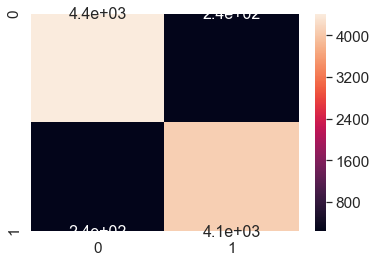

In [163]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sn
cm = confusion_matrix(Y_test, y_pred.round())

#plot_confusion_matrix(model, test_sequences_matrix, Y_test)  
#plt.show() 

#sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [165]:
%cd "C:\Users\veena\Documents\NH Hackthon"
current_affair = pd.read_csv("current_affairs_new.csv")

current_train_data = current_affair[['Statement', 'category']]
current_train_data['category_numeric'] = [0 if x =='TRUE' else 1 for x in current_train_data['category']]

current_affair_X = current_train_data[['Statement']]
current_affair_Y = current_train_data.category_numeric

current_affair_Y = le.fit_transform(current_affair_Y)
current_affair_Y = current_affair_Y.reshape(-1,1)
#current_affair_Y = to_categorical(current_affair_Y)

tok.fit_on_texts(current_affair_X.Statement)
current_affair_sequences = tok.texts_to_sequences(current_affair_X.Statement)
current_affair_sequences_matrix = sequence.pad_sequences(current_affair_sequences,maxlen=max_len)

model.fit(current_affair_sequences_matrix,current_affair_Y,batch_size=128,epochs=10,
          validation_split=0,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])


C:\Users\veena\Documents\NH Hackthon


C:\Users\veena\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Epoch 1/10
3951/3951 [==============================] - 6s 2ms/step - loss: 0.5473 - accuracy: 0.7603: 5s - loss: 0.7569 - accuracy - ETA: 4s - loss: 0.6833 - accuracy:  - ETA: 4s - loss: 0.6425 - accu - ETA: 2s - l
Epoch 2/10
 128/3951 [..............................] - ETA: 5s - loss: 0.4566 - accuracy: 0.8281

C:\Users\veena\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


3951/3951 [==============================] - 6s 2ms/step - loss: 0.4599 - accuracy: 0.8231: 2s - loss: 0.4531 - accura - ETA: 1s - loss: 0.4518 - ac
Epoch 3/10
3951/3951 [==============================] - 6s 2ms/step - loss: 0.4293 - accuracy: 0.8226: 4s - - ETA: 1s - loss: 0.4290 - 
Epoch 4/10
3951/3951 [==============================] - 6s 2ms/step - loss: 0.3874 - accuracy: 0.8233
Epoch 5/10
3951/3951 [==============================] - 6s 2ms/step - loss: 0.3434 - accuracy: 0.8390: 1s - loss: 0.3420 - 
Epoch 6/10
3951/3951 [==============================] - 6s 2ms/step - loss: 0.2827 - accuracy: 0.8704
Epoch 7/10
3951/3951 [==============================] - 7s 2ms/step - loss: 0.2408 - accuracy: 0.8970
Epoch 8/10
3951/3951 [==============================] - 6s 2ms/step - loss: 0.2168 - accuracy: 0.9142
Epoch 9/10
3951/3951 [==============================] - ETA: 0s - loss: 0.1585 - accuracy: 0.9393 ETA: 3s - loss: 0 - ETA: 1s - loss: 0.1558 -  - 6s 2ms/step - loss: 0.1589 - accuracy

In [56]:
type(X_test)

pandas.core.frame.DataFrame

In [118]:
import numpy as np
Y_test
dem = [1, 0, 1 ]

dem_Y = le.fit_transform(dem)
dem_Y = dem_Y.reshape(-1,1)

text = ["Jeanne Shaheen is the current senetor of New hampshire", "Joe Biden died in 48 seconds due to major heart attack","Jeanne Shaheen is the current senetor of New hampshire"]
dem_X = pd.DataFrame(data = text)
dem_X.columns = ['text']


In [119]:
dem

[1, 0, 1]

In [120]:
demo_seq = tok.texts_to_sequences(dem_X.text)
demo_seq_matrix = sequence.pad_sequences(demo_seq,maxlen=max_len)
demo_acc = model.evaluate(demo_seq_matrix,dem_Y)

3/3 [==============================] - 0s 5ms/step


In [121]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(demo_acc[0],demo_acc[1]))

Test set
  Loss: 2.786
  Accuracy: 0.333


In [122]:
ynew = model.predict(demo_seq_matrix,verbose=1)

3/3 [==============================] - 0s 4ms/step


In [123]:
ynew

array([[0.01533068],
       [0.00139869],
       [0.01533068]], dtype=float32)

In [125]:
dem = [1, 0]

dem_Y = le.fit_transform(dem)
dem_Y = dem_Y.reshape(-1,1)

text = ["Jeanne Shaheen is the current senetor of New hampshire", "Joe Biden died in 48 seconds due to major heart attack"]
dem_X = pd.DataFrame(data = text)
dem_X.columns = ['text']

demo_seq = tok.texts_to_sequences(dem_X.text)
demo_seq_matrix = sequence.pad_sequences(demo_seq,maxlen=max_len)
demo_acc = model.evaluate(demo_seq_matrix,dem_Y)
print("demo_acc",demo_acc)
model.fit(demo_seq_matrix,dem_Y,batch_size=128,epochs=10,
          validation_split=0,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
demo_acc = model.evaluate(demo_seq_matrix,dem_Y)
print("demo_acc",demo_acc)


2/2 [==============================] - 0s 7ms/step
demo_acc [1.1949105262756348, 0.5]
Epoch 1/10
2/2 [==============================] - 0s 28ms/step - loss: 1.0816 - accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 25ms/step - loss: 0.1621 - accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 0s 25ms/step - loss: 0.1249 - accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 24ms/step - loss: 0.1127 - accuracy: 1.0000


C:\Users\veena\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 5/10
2/2 [==============================] - 0s 25ms/step - loss: 0.0416 - accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 25ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 25ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 8/10
2/2 [==============================] - 0s 23ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 0s 24ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 0s 7ms/step
demo_acc [0.0009224574896506965, 1.0]


In [130]:
dem = [0, 1,0,1]

dem_Y = le.fit_transform(dem)
dem_Y = dem_Y.reshape(-1,1)

text = ["Jeanne Shaheen is dead", "Jeanne Shaheen is alive","Joe Biden is dead","Joe Biden is alive"]
dem_X = pd.DataFrame(data = text)
dem_X.columns = ['text']

demo_seq = tok.texts_to_sequences(dem_X.text)
demo_seq_matrix = sequence.pad_sequences(demo_seq,maxlen=max_len)
demo_acc = model.evaluate(demo_seq_matrix,dem_Y)
print("demo_acc",demo_acc)
#model.fit(demo_seq_matrix,dem_Y,batch_size=128,epochs=10,
#          validation_split=0,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
#demo_acc = model.evaluate(demo_seq_matrix,dem_Y)
ynew = model.predict(demo_seq_matrix,verbose=1)
print("Y new :L ", ynew)

4/4 [==============================] - 0s 4ms/step
demo_acc [1.8656560182571411, 0.5]
4/4 [==============================] - 0s 3ms/step
Y new :L  [[0.02456481]
 [0.02456481]
 [0.02456481]
 [0.02456481]]


In [144]:
dem = [0, 1,0,1]

dem_Y = le.fit_transform(dem)
dem_Y = dem_Y.reshape(-1,1)

text = ["Jeanne Shaheen is dead", "Jeanne Shaheen is alive","Joe Biden is dead","Joe Biden is alive"]
dem_X = pd.DataFrame(data = text)
dem_X.columns = ['text']

demo_seq = tok.texts_to_sequences(dem_X.text)
demo_seq_matrix = sequence.pad_sequences(demo_seq,maxlen=max_len)
demo_acc = model.evaluate(demo_seq_matrix,dem_Y)
print("demo_acc",demo_acc)
model.fit(demo_seq_matrix,dem_Y,batch_size=128,epochs=10,
          validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
#demo_acc = model.evaluate(demo_seq_matrix,dem_Y)
ynew = model.predict(demo_seq_matrix,verbose=1)
print("Y new :L ", ynew)

4/4 [==============================] - 0s 4ms/step
demo_acc [0.6937769651412964, 0.5]
Train on 3 samples, validate on 1 samples
Epoch 1/10
3/3 [==============================] - 0s 22ms/step - loss: 0.6804 - accuracy: 0.6667 - val_loss: 0.7392 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 3ms/step
Y new :L  [[0.47148404]
 [0.47148404]
 [0.47148404]
 [0.47148404]]


In [151]:
dem = [0,0,1,0]

dem_Y = le.fit_transform(dem)
dem_Y = dem_Y.reshape(-1,1)

text = ["Jean Shaheen is a football player", "Biden found dead in his apartment","Jean Shaheen is a human being","Joe Biden is dead"]
dem_X = pd.DataFrame(data = text)
dem_X.columns = ['text']

demo_seq = tok.texts_to_sequences(dem_X.text)
demo_seq_matrix = sequence.pad_sequences(demo_seq,maxlen=max_len)
demo_acc = model.evaluate(demo_seq_matrix,dem_Y)
print("demo_acc",demo_acc)
#model.fit(demo_seq_matrix,dem_Y,batch_size=128,epochs=10,
      #    validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
#demo_acc = model.evaluate(demo_seq_matrix,dem_Y)
ynew = model.predict(demo_seq_matrix,verbose=1)
print("Y new :L ", ynew)

4/4 [==============================] - 0s 2ms/step
demo_acc [0.6416919231414795, 0.75]
4/4 [==============================] - 0s 3ms/step
Y new :L  [[0.46461144]
 [0.3790954 ]
 [0.43703377]
 [0.47148404]]


In [150]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)

In [103]:
def LSTMKerasModel_Dense2():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(2,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

model_dense2 = LSTMKerasModel_Dense2()
model_dense2.summary()
model_dense2.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.005),metrics=['accuracy'])

model_dense2.fit(sequences_matrix,Y_train,batch_size=128,epochs=5,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 2)                 514 

C:\Users\veena\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 28734 samples, validate on 7184 samples
Epoch 1/5
28734/28734 [==============================] - 38s 1ms/step - loss: 0.1465 - accuracy: 0.9460 - val_loss: 0.0899 - val_accuracy: 0.9669
Epoch 2/5
28734/28734 [==============================] - 41s 1ms/step - loss: 0.0987 - accuracy: 0.9672 - val_loss: 0.0627 - val_accuracy: 0.9779
Epoch 3/5
28734/28734 [==============================] - 41s 1ms/step - loss: 0.0999 - accuracy: 0.9660 - val_loss: 0.1311 - val_accuracy: 0.9614


In [104]:
test_sequences = tok.texts_to_sequences(X_test.text)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

Y_test_cat = to_categorical(Y_test)
accr = model_dense2.evaluate(test_sequences_matrix,Y_test_cat)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

8980/8980 [==============================] - 6s 657us/step
Test set
  Loss: 0.161
  Accuracy: 0.956


In [105]:
demo_seq = tok.texts_to_sequences(dem_X.text)
demo_seq_matrix = sequence.pad_sequences(demo_seq,maxlen=max_len)

dem_cat_Y = to_categorical(dem_Y)

demo_acc = model_dense2.evaluate(demo_seq_matrix,dem_cat_Y)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(demo_acc[0],demo_acc[1]))

2/2 [==============================] - 0s 7ms/step
Test set
  Loss: 0.657
  Accuracy: 0.500


In [106]:
 model_dense2.predict(demo_seq_matrix,verbose=1)

2/2 [==============================] - 0s 32ms/step


array([[0.6373239 , 0.3556639 ],
       [0.7495553 , 0.25324905]], dtype=float32)